<a href="https://colab.research.google.com/github/PRARTHANA-G01/Sentiment_Stock_Relation/blob/main/TSLA_project_final_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

In [ ]:
import numpy as np

In [ ]:
!pip install vaderSentiment

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Read files and select features

In [ ]:
tweets_df = pd.read_csv(r'C:\Users\lmqke\Desktop\stock_tweets.csv',parse_dates=['Date'])
stock_prices_df = pd.read_csv(r'C:\Users\lmqke\Desktop\stock_yfinance_data.csv',parse_dates=['Date'])

In [ ]:
tweets_df = tweets_df.loc[tweets_df['Stock Name'] == 'TSLA']
stock_prices_df = stock_prices_df.loc[stock_prices_df['Stock Name'] == 'TSLA']

In [ ]:
tweets_df.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [ ]:
stock_prices_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


# Uniform data type for Date column

In [ ]:
# Remove timezone info to make both columns timezone-naive
tweets_df['Date'] = pd.to_datetime(tweets_df['Date']).dt.tz_localize(None)
tweets_df['Date'] = pd.to_datetime(tweets_df['Date'].dt.date)
stock_prices_df['Date'] = pd.to_datetime(stock_prices_df['Date']).dt.tz_localize(None)

tweets_df.set_index('Date', inplace=True)
stock_prices_df.set_index('Date', inplace=True)

start_date = max(tweets_df.index.min(), stock_prices_df.index.min())
end_date = min(tweets_df.index.max(), stock_prices_df.index.max())

print("Common Date Range:")
print(f"Start Date: {start_date.strftime('%Y-%m-%d')}")
print(f"End Date: {end_date.strftime('%Y-%m-%d')}")


Common Date Range:
Start Date: 2021-09-30
End Date: 2022-09-29


In [ ]:
stock_prices_df.head()

,Open,High,Low,Close,Adj Close,Volume,Stock Name
Date,,,,,,,
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [ ]:
tweets_df.head()

,Tweet,Stock Name,Company Name
Date,,,
2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


# Cleaning tweets and Vader sentiment analysis

In [ ]:
'''Cleaning the tweets'''

import re

def clean_tweet(text):

    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtag symbol
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove emojis and non-ASCII characters
    text = text.lower()  # Convert text to lowercase
    return text

# Apply the cleaning function to the 'Tweet' column
tweets_df['Cleaned Tweet'] = tweets_df['Tweet'].apply(clean_tweet)


In [ ]:
'''Initialize VADER sentiment analyzer'''

analyzer = SentimentIntensityAnalyzer()


# Function to get sentiment scores
def analyze_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Use the compound score as the overall sentiment score

# Apply the sentiment analysis to each cleaned tweet
tweets_df['Sentiment Score'] = tweets_df['Cleaned Tweet'].apply(analyze_sentiment)
tweets_df.columns = tweets_df.columns.str.strip()  # Remove leading/trailing spaces

# Display the first few rows of the updated dataset with sentiment scores
tweets_df.head()

,Tweet,Stock Name,Company Name,Cleaned Tweet,Sentiment Score
Date,,,,,
2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",mainstream media has done an amazing job at br...,0.0772
2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",tesla delivery estimates are at around 364k fr...,0.0000
2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",3 even if i include 630m unvested rsus as of 6...,0.2960
2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",hahaha why are you still trying to stop tes...,-0.7096
2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",stop trying to kill kids you sad deranged ol...,-0.8750


In [ ]:
'''Create sentiment categories: positive if sentiment score is >0.05, negative if the score<-0.05, and others as neutral, we do not want to include those neutral ones in the prediction'''
tweets_df['positive'] = tweets_df['Sentiment Score'].apply(lambda x: 1 if x > 0.05 else 0)
tweets_df['negative'] = tweets_df['Sentiment Score'].apply(lambda x: 1 if x < -0.05 else 0)
tweets_df['neutral'] = tweets_df['Sentiment Score'].apply(lambda x: 1 if -0.05<=x <=0.05 else 0)

In [ ]:
tweets_df.head()

,Tweet,Stock Name,Company Name,Cleaned Tweet,Sentiment Score,positive,negative,neutral
Date,,,,,,,,
2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",mainstream media has done an amazing job at br...,0.0772,1,0,0
2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",tesla delivery estimates are at around 364k fr...,0.0000,0,0,1
2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",3 even if i include 630m unvested rsus as of 6...,0.2960,1,0,0
2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",hahaha why are you still trying to stop tes...,-0.7096,0,1,0
2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",stop trying to kill kids you sad deranged ol...,-0.8750,0,1,0


In [ ]:
''' Aggregate sentiment scores by date (mean sentiment score for each day)'''
daily_sentiment = tweets_df.groupby('Date')['Sentiment Score'].mean().reset_index()

# Generate sentiment score and comment count based on date
daily_sentiment = tweets_df.groupby('Date').agg({
    'positive': 'sum',
    'negative': 'sum',
    'neutral': 'sum',
    'Sentiment Score': 'mean'
}).reset_index()

# Rename for clarity
daily_sentiment.rename(columns={
    'positive': 'positive_count',
    'negative': 'negative_count',
    'neutral': 'neutral_count',
    'Sentiment Score': 'average_sentiment_score'
}, inplace=True)

# Display the daily sentiment scores
daily_sentiment.head()

,Date,positive_count,negative_count,neutral_count,average_sentiment_score
0,2021-09-30,54,23,13,0.245999
1,2021-10-01,50,16,28,0.211813
2,2021-10-02,61,18,37,0.236854
3,2021-10-03,36,11,14,0.262636
4,2021-10-04,51,22,46,0.121086


In [ ]:
# Sum (or count) of tweets per day
tweets_per_day = tweets_df.groupby('Date').size().reset_index(name='Tweet Count')

# Display the result
print(tweets_per_day)

          Date  Tweet Count
0   2021-09-30           90
1   2021-10-01           94
2   2021-10-02          116
3   2021-10-03           61
4   2021-10-04          119
..         ...          ...
360 2022-09-25           36
361 2022-09-26           72
362 2022-09-27           85
363 2022-09-28           75
364 2022-09-29          112

[365 rows x 2 columns]


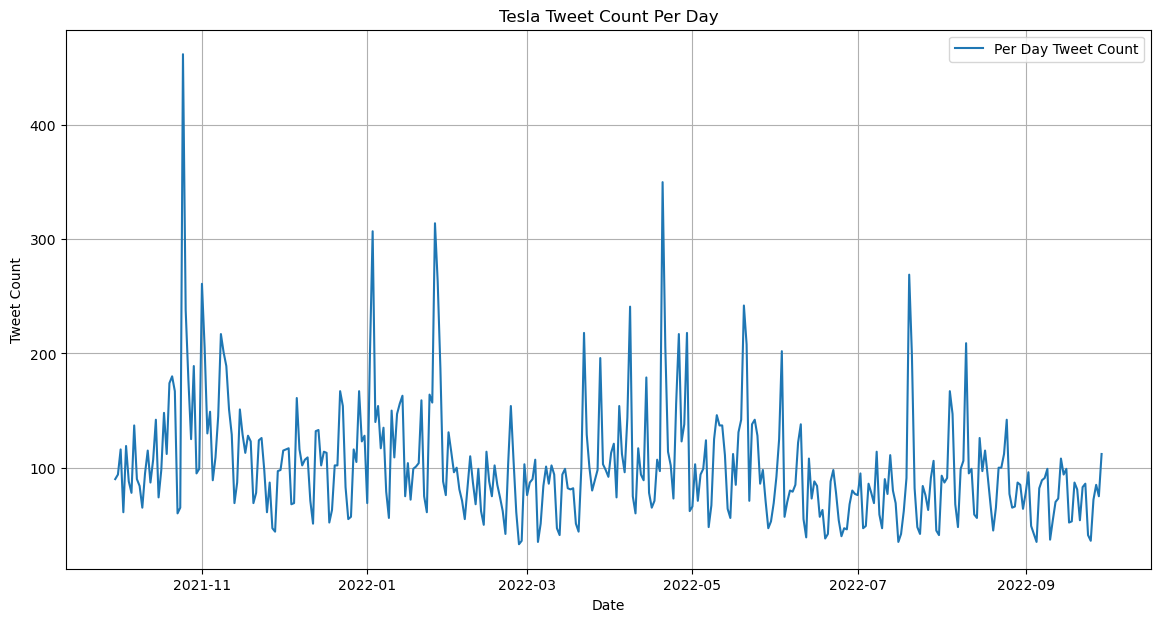

In [ ]:
import matplotlib.pyplot as plt


# Close price change
plt.figure(figsize=(14, 7))
plt.plot(tweets_per_day['Date'], tweets_per_day['Tweet Count'], label='Per Day Tweet Count')
plt.title("Tesla Tweet Count Per Day")
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.legend()
plt.grid(True)
plt.show()


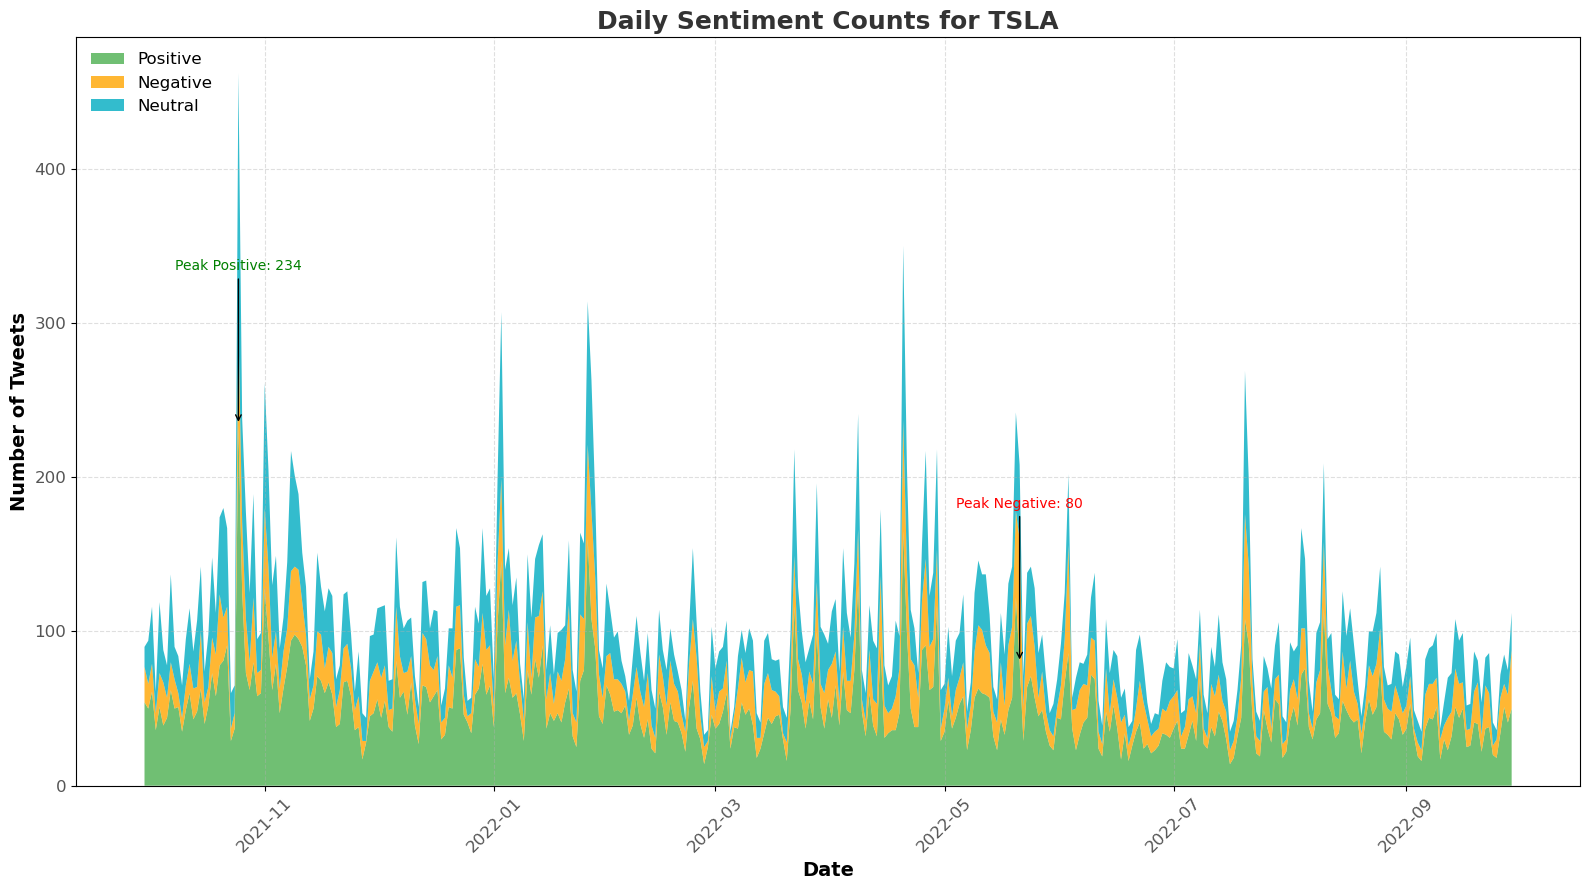

In [ ]:
''' Visualization for comment count'''
dates = daily_sentiment['Date']
positive_counts = daily_sentiment['positive_count']
negative_counts = daily_sentiment['negative_count']
neutral_counts = daily_sentiment['neutral_count']

import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(16, 9))
plt.stackplot(dates, positive_counts, negative_counts, neutral_counts,
              labels=['Positive', 'Negative', 'Neutral'],
              colors=['#4CAF50', 'orange', '#00ACC1'], alpha=0.8)

# Labels and Titles
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Number of Tweets', fontsize=14, fontweight='bold')
plt.title('Daily Sentiment Counts for TSLA', fontsize=18, fontweight='bold', color="#333333")

# Customizing ticks and legend
plt.xticks(rotation=45, fontsize=12, color="#555555")
plt.yticks(fontsize=12, color="#555555")
plt.legend(loc='upper left', fontsize=12, frameon=False)
plt.grid(visible=True, linestyle='--', alpha=0.4)

# Highlight peak dates with annotations
max_positive_date = dates[positive_counts.idxmax()]
plt.annotate(f'Peak Positive: {positive_counts.max()}', xy=(max_positive_date, positive_counts.max()),
             xytext=(max_positive_date, positive_counts.max() + 100), ha='center', color='green',
             arrowprops=dict(facecolor='green', arrowstyle="->"))

max_negative_date = dates[negative_counts.idxmax()]
plt.annotate(f'Peak Negative: {negative_counts.max()}', xy=(max_negative_date, negative_counts.max()),
             xytext=(max_negative_date, negative_counts.max() + 100), ha='center', color='red',
             arrowprops=dict(facecolor='red', arrowstyle="->"))

plt.tight_layout()
plt.show()


# Stock feature calculation

In [ ]:
''' Feature Engineering for stock prices'''
stock_prices_df['fluctuation'] = stock_prices_df['High'] - stock_prices_df['Low']
stock_prices_df['price_gain'] = stock_prices_df['Close'] - stock_prices_df['Open']
stock_prices_df['total_valuation_eod'] = stock_prices_df['Volume'] * stock_prices_df['Close']

In [ ]:
stock_prices_df.head()

,Open,High,Low,Close,Adj Close,Volume,Stock Name,fluctuation,price_gain,total_valuation_eod
Date,,,,,,,,,,
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,4.709991,-1.839996,1.392452e+10
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,5.730011,-1.059998,1.320308e+10
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,10.283325,-4.989990,2.382361e+10
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA,7.703308,-1.403351,1.438830e+10
2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA,4.480011,2.183319,1.145382e+10


In [ ]:
'''Create the target variable (upward/downward trend based on next day's closing price)'''
stock_prices_df['price_trend'] = np.where(stock_prices_df['Close'].shift(-1) > stock_prices_df['Close'], 1, 0)

# Remove the last row where the target can't be determined
stock_prices_df.dropna(subset=['price_trend'], inplace=True)

stock_prices_df


,Open,High,Low,Close,Adj Close,Volume,Stock Name,fluctuation,price_gain,total_valuation_eod,price_trend
Date,,,,,,,,,,,
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,4.709991,-1.839996,1.392452e+10,0
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,5.730011,-1.059998,1.320308e+10,1
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,10.283325,-4.989990,2.382361e+10,0
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA,7.703308,-1.403351,1.438830e+10,1
2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA,4.480011,2.183319,1.145382e+10,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63748400,TSLA,11.679993,-7.760010,1.755185e+10,1
2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,TSLA,13.779999,4.180023,1.602981e+10,1
2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,TSLA,11.160004,-0.899994,1.752112e+10,1


In [ ]:
'''Count up, down, and no-change days to see if the dataset is imbalanced'''
up_count = stock_prices_df['price_trend'].value_counts().get(1, 0)
down_count = stock_prices_df['price_trend'].value_counts().get(0, 0)
no_change_count = stock_prices_df['price_trend'].value_counts().get(2, 0)  # Use 2 if you have a label for no-change

# Print the results
print(f"Number of Up Days: {up_count}")
print(f"Number of Down Days: {down_count}")
print(f"Number of No-Change Days: {no_change_count}")


Number of Up Days: 133
Number of Down Days: 119
Number of No-Change Days: 0


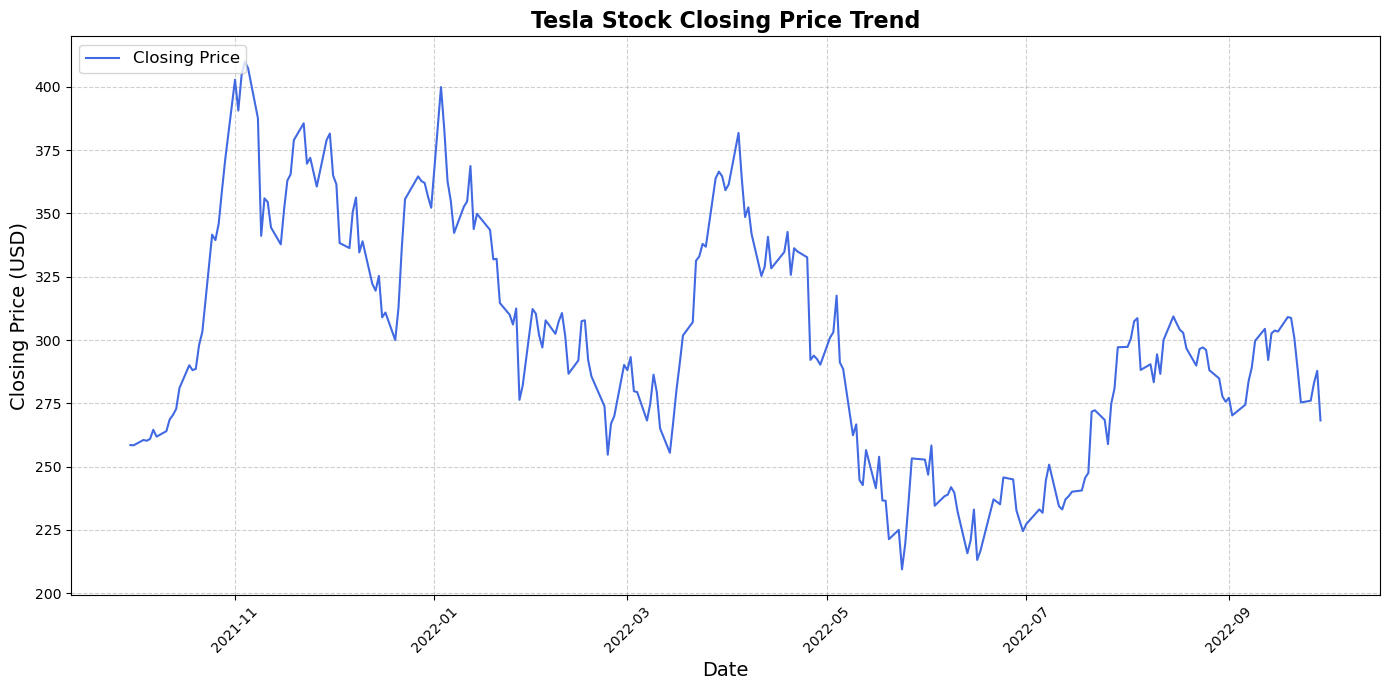

In [ ]:
# Plotting the stock price trend
plt.figure(figsize=(14, 7))
plt.plot(stock_prices_df.index, stock_prices_df['Close'], label='Closing Price', color='royalblue')
plt.title("Tesla Stock Closing Price Trend", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Closing Price (USD)", fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


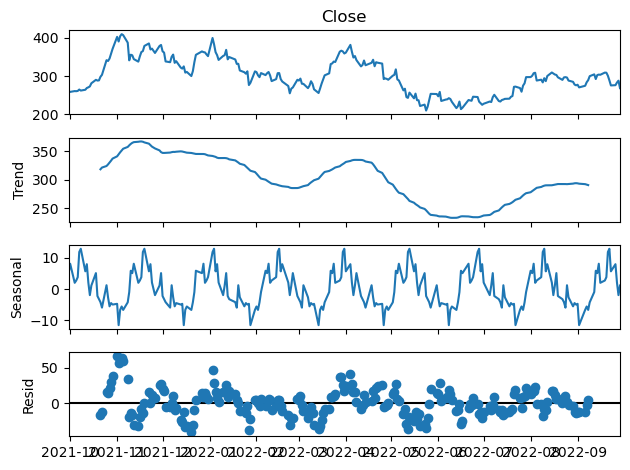

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(stock_prices_df['Close'], model='additive', period=30)
decomposition.plot()
plt.show()

# To identify if there's seasonal trend, so we can divide our dataset in the later timeseries split

# Merge tweet and stock datasets

In [ ]:
'''Merge the daily sentiment scores with the stock prices on the 'Date' column'''
merged_data = pd.merge(stock_prices_df, daily_sentiment, on='Date', how='inner')

# Display the first few rows of the merged dataset
merged_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,fluctuation,price_gain,total_valuation_eod,price_trend,positive_count,negative_count,neutral_count,average_sentiment_score
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,4.709991,-1.839996,1.392452e+10,0,54,23,13,0.245999
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,5.730011,-1.059998,1.320308e+10,1,50,16,28,0.211813
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,10.283325,-4.989990,2.382361e+10,0,51,22,46,0.121086
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA,7.703308,-1.403351,1.438830e+10,1,39,28,21,0.081674
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA,4.480011,2.183319,1.145382e+10,1,44,13,21,0.214333


In [ ]:
import numpy as np

mean_sentiment = merged_data['average_sentiment_score'].mean()
std_sentiment = merged_data['average_sentiment_score'].std()
high_sentiment_days = merged_data[merged_data['average_sentiment_score'] > mean_sentiment + std_sentiment]
low_sentiment_days = merged_data[merged_data['average_sentiment_score'] < mean_sentiment - std_sentiment]

plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Close'], color='grey', alpha=0.6, label='Stock Price')
plt.scatter(high_sentiment_days['Date'], high_sentiment_days['Close'], color='green', label='High Sentiment Days')
plt.scatter(low_sentiment_days['Date'], low_sentiment_days['Close'], color='red', label='Low Sentiment Days')
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Stock Price with Extreme Sentiment Days Highlighted")
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Selecting the lags

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
''' creating the lags'''
for lag in [1, 3, 7, 14, 21]:
    merged_data[f'sentiment_lag_{lag}'] = merged_data['average_sentiment_score'].shift(lag)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

''' print out the correlation between close price and sentiment lags'''
for lag in [1, 3, 7, 14, 21]:
    merged_data[f'sentiment_lag_{lag}'] = merged_data['average_sentiment_score'].shift(lag)

# Select columns for correlation matrix
correlation_features = [f'sentiment_lag_{lag}' for lag in [1, 3, 7, 14, 21]] + ['Close']
correlation_data = merged_data[correlation_features].dropna()

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap between Sentiment Lags and Close Price")
plt.show()


## We deicded to select lag7 as it show the highiest correlation with the closing price, The sentiment_lag_7 provides a balanced lag period, capturing weekly sentiment trends while maintaining relevance to stock movements. Only choosing one lag because we dont want more multicolinearity

# Logistic Regression

In [ ]:
features = [
    'fluctuation', 'price_gain', 'total_valuation_eod',
    'positive_count', 'negative_count', 'average_sentiment_score','sentiment_lag_7'
]

merged_data.dropna(inplace=True)
print(features)


In [ ]:
X = merged_data [features].dropna()
y = merged_data['price_trend'].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shapes of the features and target
print(X.shape, y.shape)

In [ ]:
# Keep original data
X_train_original = X_train.copy()
X_test_original = X_test.copy()


In [ ]:
''' standardization for input data for logistic regression'''

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)



In [ ]:
from sklearn.linear_model import LogisticRegression# Initialize the logistic regression model
''' run the logistic mdoel'''
logistic_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Fit the model
logistic_model.fit(X_train_std, y_train)


In [ ]:
from sklearn.metrics import make_scorer, f1_score, roc_auc_score
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import numpy as np

tscv = TimeSeriesSplit(n_splits=4)


In [ ]:
from sklearn.model_selection import cross_val_score
''' show the results from the logistic regression model'''
'''Define scorers'''
scorer_f1 = make_scorer(f1_score)
scorer_roc_auc = make_scorer(roc_auc_score, needs_proba=True)

# Cross-validation scores
f1_scores_logistic = cross_val_score(logistic_model, X, y, cv=tscv, scoring=scorer_f1)
roc_auc_scores_logistic = cross_val_score(logistic_model, X, y, cv=tscv, scoring=scorer_roc_auc)

print(f'Logistic Regression F1 Scores for each fold: {f1_scores_logistic}')
print(f'Mean F1 Score: {np.mean(f1_scores_logistic):.2f}')
print(f'Logistic Regression ROC AUC Scores for each fold: {roc_auc_scores_logistic}')
print(f'Mean ROC AUC Score: {np.mean(roc_auc_scores_logistic):.2f}')


## The Logistc regression is not perfrming well in predicting the trend

In [ ]:
'''plot the data splits'''
plt.figure(figsize=(14, 8))

for fold, (train_index, test_index) in enumerate(tscv.split(merged_data), 1):
    # Adjust these lines according to the correct dataset
    plt.fill_between(train_index, fold - 0.4, fold + 0.4, color='skyblue', alpha=0.5, label='Train' if fold == 1 else "")
    plt.fill_between(test_index, fold - 0.4, fold + 0.4, color='orange', alpha=0.5, label='Test' if fold == 1 else "")

plt.xlabel("Index Range")
plt.ylabel("Fold Index")
plt.title("Data Coverage for Each Fold in TimeSeriesSplit")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


# Random Forest analysis

In [ ]:

from sklearn.ensemble import RandomForestClassifier


In [ ]:

tscv = TimeSeriesSplit(n_splits=4)


In [ ]:
''' To select the best combination based on f1 score'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train = X_train_original
X_test = X_test_original

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 7, 10, 15],
    'min_samples_leaf': [1, 5, 7, 10],
    'max_features': ['sqrt', 'log2', None]
}


model = RandomForestClassifier(random_state=42, class_weight='balanced')


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',
    cv=tscv,
    n_jobs=-1
)


grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best f1 Score:", grid_search.best_score_)



In [ ]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Results

In [ ]:
'''F1 and ROC AUC scores for each fold using the best model we found'''
from sklearn.model_selection import TimeSeriesSplit

scorer_f1 = make_scorer(f1_score)
scorer_roc_auc = make_scorer(roc_auc_score, needs_proba=True)

f1_scores = cross_val_score(best_model, X, y, cv=tscv, scoring=scorer_f1)
roc_auc_scores = cross_val_score(best_model, X, y, cv=tscv, scoring=scorer_roc_auc)

print(f'F1 Scores for each fold: {f1_scores}')
print(f'Mean F1 Score: {np.mean(f1_scores):.2f}')
print(f'ROC AUC Scores for each fold: {roc_auc_scores}')
print(f'Mean ROC AUC Score: {np.mean(roc_auc_scores):.2f}')


In [ ]:
folds = range(1, len(f1_scores) + 1)
plt.figure(figsize=(10, 5))
plt.plot(folds, f1_scores, marker='o', label='F1 Score')
plt.axhline(y=np.mean(f1_scores), color='r', linestyle='--', label='Mean F1 Score')
plt.xlabel("Fold")
plt.ylabel("F1 Score")
plt.title("F1 Score across TimeSeriesSplit Folds")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(folds, roc_auc_scores, marker='o', color='orange', label='ROC AUC Score')
plt.axhline(y=np.mean(roc_auc_scores), color='r', linestyle='--', label='Mean ROC AUC Score')
plt.xlabel("Fold")
plt.ylabel("ROC AUC Score")
plt.title("ROC AUC Score across TimeSeriesSplit Folds")
plt.legend()
plt.show()


### Evaluation for the last fold and the third folds: the model in improving the performance before the last period, but the score dropped significantlt when it comes to predicting the stock trend in the last period. We want to see the difference based on the reuslts

##### For the last fold

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt


tscv = TimeSeriesSplit(n_splits=4)
last_fold = list(tscv.split(X))[-1]  # Last fold
train_index, test_index = last_fold

X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]


best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]


In [ ]:
f1_last_fold = f1_score(y_test, y_pred)
print(f"F1 Score for the last fold: {f1_last_fold:.2f}")


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap='Blues')
plt.title("Confusion Matrix for the Last Fold")
plt.show()


## A huge amount of false positive and false negative

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the Last Fold')
plt.legend(loc="lower right")
plt.show()


### For the Third fold

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

tscv = TimeSeriesSplit(n_splits=4)
third_fold = list(tscv.split(X))[2]  # Third fold is the second index (0-based)

train_index, test_index = third_fold  # Correctly assign third fold's indices

X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Train and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# F1 score for the third fold
f1_third_fold = f1_score(y_test, y_pred)
print(f"F1 Score for the Third Fold: {f1_third_fold:.2f}")

# Confusion matrix for the third fold
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap='Blues')
plt.title("Confusion Matrix for the Third Fold")
plt.show()

# ROC curve for the third fold
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the Third Fold')
plt.legend(loc="lower right")
plt.show()


## It can predict the trende mostly correctly, while False positive still persist: could because of the imbalanced data set

## Feature importance: we also perform the improatcne visualization for the 4th fold prediction and 3rd fold to improve the validity

In [ ]:
'''Feature importance for the general model'''
import pandas as pd
import matplotlib.pyplot as plt


feature_names = X.columns
importances = best_model.feature_importances_  #Feature importance from the trained best model in general


feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

feature_importances = feature_importances.sort_values(by='importance', ascending=False)
feature_importances['importance_percent'] = feature_importances['importance'] * 100


plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance_percent'], color='skyblue')
plt.xlabel("Feature Importance (%)")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()


print(feature_importances[['feature', 'importance_percent']])


In [ ]:

n_folds = 4  #
len_last_fold = len(y) // n_folds

# Exclude the last period data
X_excluded = X[:-len_last_fold]
y_excluded = y[:-len_last_fold]

# Re-train the model without the last period
best_model_excluded = RandomForestClassifier(random_state=42, class_weight='balanced')
best_model_excluded.fit(X_excluded, y_excluded)

# Calculate feature importance
importances_excluded = best_model_excluded.feature_importances_

# Create DataFrame for feature importances
feature_importances_excluded = pd.DataFrame({
    'feature': X.columns,
    'importance': importances_excluded
})

# Sort and calculate percentage
feature_importances_excluded = feature_importances_excluded.sort_values(by='importance', ascending=False)
feature_importances_excluded['importance_percent'] = feature_importances_excluded['importance'] * 100

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_excluded['feature'], feature_importances_excluded['importance_percent'], color='skyblue')
plt.xlabel("Feature Importance (%)")
plt.title("Feature Importance in Random Forest Model (Excluding Last Period)")
plt.gca().invert_yaxis()
plt.show()

# Print the feature importance DataFrame
print(feature_importances_excluded[['feature', 'importance_percent']])



In [ ]:
''' comparison between feature importance in general and the one exludes the last period'''
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original Feature Importances
axes[0].barh(feature_importances['feature'], feature_importances['importance_percent'], color='skyblue')
axes[0].set_title('Feature Importance Including All Data')
axes[0].invert_yaxis()

# Feature Importances Excluding Last Period
axes[1].barh(feature_importances_excluded['feature'], feature_importances_excluded['importance_percent'], color='lightgreen')
axes[1].set_title('Feature Importance Excluding Last Period')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


### Combined both feature importanc plot, it shows that among all the features, sentiment with 7 days lag is the most important feature,  indicating that sentiment from the past week plays a significant role in predicting stock price trends.

## To explore the reason why model behaves worse when it comes to fold 4, we print the plot to see the stock price trend and explain it combining with reality news

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=4)

# Get the indices for the third and last folds
folds = list(tscv.split(stock_prices_df))
third_fold = folds[-2]
last_fold = folds[-1]

# Extract training and test indices for each fold
_, third_test_index = third_fold
_, last_test_index = last_fold

# Plot the actual prices
plt.figure(figsize=(14, 7))
plt.plot(stock_prices_df['Close'], color='lightgrey', label='Actual Price')

# Highlight the third fold's test set
plt.plot(stock_prices_df.index[third_test_index], stock_prices_df['Close'].iloc[third_test_index],
         color='blue', label='Fold 3 Test Set')

# Highlight the last fold's test set
plt.plot(stock_prices_df.index[last_test_index], stock_prices_df['Close'].iloc[last_test_index],
         color='orange', label='Fold 4 Test Set')

# Add labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Stock Price with Fold 3 and Fold 4 Test Sets Highlighted")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()
